<a href="https://colab.research.google.com/github/mhussainahmad/Pfizer-Vaccine-Sentiment-Analysis/blob/main/Pfizer_Vaccine_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries

In [20]:
!pip install -U nltk[all]

In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

Importing Dataset

In [34]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Twitter sentiment analysis.txt')
data.head()

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet
0,1340539111971516416,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,2009-04-08 17:52:46,405,1692,3247,False,2020-12-20 06:06:44,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False
1,1338158543359250433,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",2009-09-21 15:27:30,834,666,178,False,2020-12-13 16:27:13,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False
2,1337858199140118533,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",2020-06-25 23:30:28,10,88,155,False,2020-12-12 20:33:45,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False
3,1337855739918835717,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",2008-09-10 11:28:53,49165,3933,21853,True,2020-12-12 20:23:59,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False
4,1337854064604966912,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,2020-04-23 17:58:42,152,580,1473,False,2020-12-12 20:17:19,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False


Checking for null values

In [35]:
data.isnull().sum()

id                     0
user_name              0
user_location       1630
user_description     506
user_created           0
user_followers         0
user_friends           0
user_favourites        0
user_verified          0
date                   0
text                   0
hashtags            1949
source                 1
retweets               0
favorites              0
is_retweet             0
dtype: int64

Dropping the null values

In [36]:
data = data.dropna()
print(data.describe())

                 id  user_followers   user_friends  user_favourites  \
count  4.749000e+03    4.749000e+03    4749.000000      4749.000000   
mean   1.355333e+18    5.069683e+04    1341.396926     14523.124447   
std    1.280104e+16    3.545440e+05    3453.847283     36379.651961   
min    1.337728e+18    0.000000e+00       0.000000         0.000000   
25%    1.344929e+18    1.740000e+02     215.000000       497.000000   
50%    1.352030e+18    6.480000e+02     549.000000      2713.000000   
75%    1.364940e+18    2.728000e+03    1419.000000     12258.000000   
max    1.384788e+18    1.371493e+07  103226.000000    854011.000000   

          retweets    favorites  
count  4749.000000  4749.000000  
mean      1.545378     9.385555  
std      13.395572    55.280915  
min       0.000000     0.000000  
25%       0.000000     0.000000  
50%       0.000000     1.000000  
75%       1.000000     5.000000  
max     678.000000  1979.000000  


Importing Libraries to extract data from opinions

In [37]:
import nltk
import re
nltk.download('stopwords')
stemmer = nltk.SnowballStemmer('english')
from nltk.corpus import stopwords
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Extracting data

In [38]:
stopword = set(stopwords.words('english'))
def clean(text):
  text = str(text).lower()
  text = re.sub('\[.*?\]', '', text)
  text = re.sub('https?://\S+|www\.\S+', '', text)
  text = re.sub('<.*?>+', '',text)
  text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
  text = re.sub('\n', '', text)
  text = re.sub('\w*\d\w*', '', text)
  text = [word for word in text.split(' ') if word not in stopword]
  text = ''.join(text)
  text = [stemmer.stem(word) for word in text.split(' ')]
  text = ''.join(text)
  return text
data['text'] = data['text'].apply(clean)

Visualizing the text cloud of text column

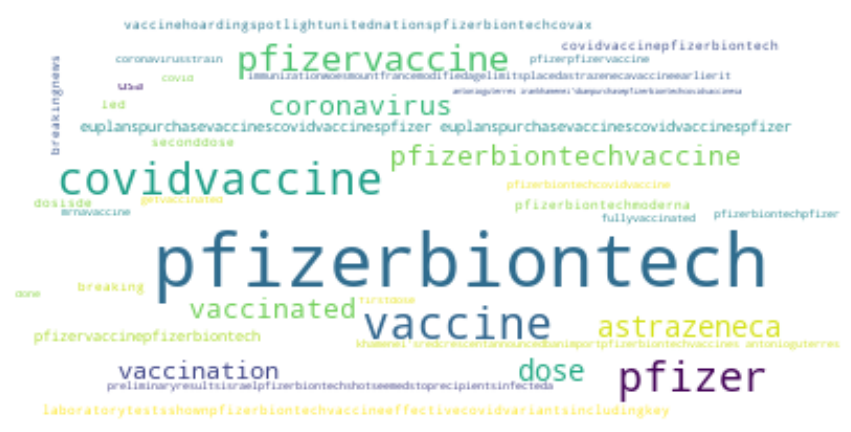

In [39]:
text = ''.join(i for i in data.text)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, background_color='white').generate(text)
plt.figure( figsize = (15,10))
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

Wordcloud of hashtags column

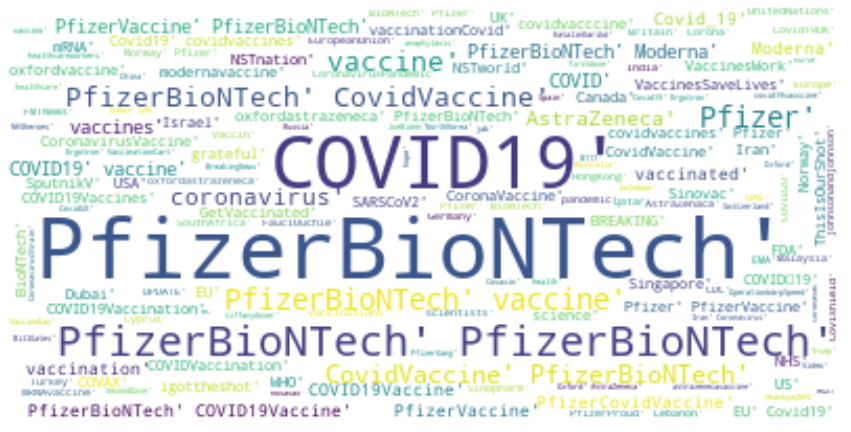

In [40]:
text = ''.join(i for i in data.hashtags)
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords = stopwords, background_color='white').generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


Checking the opinion of public figures(verified user)

In [41]:
data['user_verified'].value_counts()

False    4169
True      580
Name: user_verified, dtype: int64

Creating negative, positive and neutral opinion columns

In [46]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
data['Positive'] = [sentiments.polarity_scores(i)['pos'] for i in data['text']]
data['Negative'] = [sentiments.polarity_scores(i)['neg'] for i in data['text']]
data['Neutral'] = [sentiments.polarity_scores(i)['neu'] for i in data['text']]
data = data[['text', 'Positive', 'Negative', 'Neutral']]
print(data.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
                                                 text  Positive  Negative  \
0   folkssaiddaikonpastecouldtreatcytokinestormpfi...       0.0       0.0   
2   coronavirussputnikvastrazenecapfizerbiontechmo...       0.0       0.0   
6   bitsadclaimfamesuccessvaccinationpatrioticcomp...       0.0       0.0   
9   covidvaccine\r\rstatesstartgettingmondayussays...       0.0       0.0   
10  deathsclosingmarkmillionspeoplewaitpfizerbiont...       0.0       0.0   

    Neutral  
0       1.0  
2       1.0  
6       1.0  
9       1.0  
10      1.0  


Checking the sentiments

In [43]:
x = sum(data['Positive'])
y = sum(data['Negative'])
z = sum(data['Neutral'])

def sentiment_score(a, b, c):
  if (a>b) and (a>c):
    print('Positive sentiment')
  elif (b>a) and (b>c):
    print('Negative sentiment')
  else:
    print('Neutral sentiment')
sentiment_score(x, y, z)

Neutral sentiment


Checking the number of total Positive, Negative and Neutral sentiment

In [44]:
print('Positive:', x)
print('Negative:', y)
print('Neutral:', z)

Positive: 7.456
Negative: 0.0
Neutral: 4741.543999999999
